# Post processing neutral ABL

In [1]:
%%capture 

# Important header information
amrwindfedir = '/projects/wind_uq/lcheung/amrwind-frontend'         # official version
#amrwindfedir = '/ascldap/users/lcheung/local/Git/amrwind-frontend'  # My copy
import sys, os
sys.path.insert(1, amrwindfedir)

# Load the libraries
import matplotlib.pyplot as plt
import amrwind_frontend  as amrwind
import numpy             as np
from matplotlib import cm
import re

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
saveplots = False
savedir   = '../abstract/images'

## Load velocity profiles

In [3]:
# Set your run directory here
casedir = '/ascldap/users/lcheung/GPFS/2022/HFM_Q4/precursor/precursor2_5x5_uniform/'
talldir = '/ascldap/users/lcheung/GPFS/2022/HFM_Q4/precursor/precursor2b_5x5_tallrefined/'

# Average between 15,000 sec to 20,000 sec
avgtimes = [15000, 20000]

# Hub-height locations
plotheights=[150]

### Load the uniform case

In [4]:
# Start the amrwind_frontend app 
case = amrwind.MyApp.init_nogui()
case.ABLpostpro_loadnetcdffile(casedir+'/post_processing/abl_statistics00000.nc')

Loading /ascldap/users/lcheung/GPFS/2022/HFM_Q4/precursor/precursor2_5x5_uniform//post_processing/abl_statistics00000.nc
Time range: 0.250000 to 20000.000000
Done.


In [5]:
# First, let's look at the hub-height averaged statistics
case.ABLpostpro_printreport(avgt=avgtimes, avgz=plotheights)

Loading w'theta'_r
Loading theta
Loading u
Loading v'v'_r
Loading v
Loading u'u'_r
Loading w'w'_r
        z       Uhoriz      WindDir       TI_TKE     TI_horiz        Alpha     ObukhovL 
      ===         ====         ====         ====         ====         ====         ==== 
   150.00 8.999992e+00 2.250013e+02 3.932531e-02 6.027710e-02 5.914113e-02 4.068959e+07 

ustar: 0.241869


{'Alpha': [array(0.05914113434232178)],
 'ObukhovL': [array(40689586.07101465)],
 'TI_TKE': [array(0.0393253096912511)],
 'TI_horiz': [array(0.0602770962452646)],
 'Uhoriz': [array(8.999991965082222)],
 'WindDir': [array(225.00125616662126)],
 'ustar': 0.24186918086809905}

### Load the tall refined case

In [6]:
# Start the amrwind_frontend app 
tall = amrwind.MyApp.init_nogui()
tall.ABLpostpro_loadnetcdffile(talldir+'/post_processing/abl_statistics00000.nc')

Loading /ascldap/users/lcheung/GPFS/2022/HFM_Q4/precursor/precursor2b_5x5_tallrefined//post_processing/abl_statistics00000.nc
Time range: 0.250000 to 20000.000000
Done.


In [7]:
# First, let's look at the hub-height averaged statistics
tall.ABLpostpro_printreport(avgt=avgtimes, avgz=plotheights)

Loading w'theta'_r
Loading theta
Loading u
Loading v'v'_r
Loading v
Loading u'u'_r
Loading w'w'_r
        z       Uhoriz      WindDir       TI_TKE     TI_horiz        Alpha     ObukhovL 
      ===         ====         ====         ====         ====         ====         ==== 
   150.00 8.984035e+00 2.249113e+02 3.322392e-02 5.129968e-02 4.543250e-02 1.232137e+07 

ustar: 0.240954


{'Alpha': [array(0.045432503538720775)],
 'ObukhovL': [array(12321369.315713933)],
 'TI_TKE': [array(0.03322391523393924)],
 'TI_horiz': [array(0.051299683179871686)],
 'Uhoriz': [array(8.984035068824202)],
 'WindDir': [array(224.91125386107993)],
 'ustar': 0.24095373528092759}

## Make some plots

In [8]:
amrdat  = case.ABLpostpro_plotscalars(ax=None, plotvars=['ustar'], doplot=False)
talldat = tall.ABLpostpro_plotscalars(ax=None, plotvars=['ustar'], doplot=False)

ustar
ustar


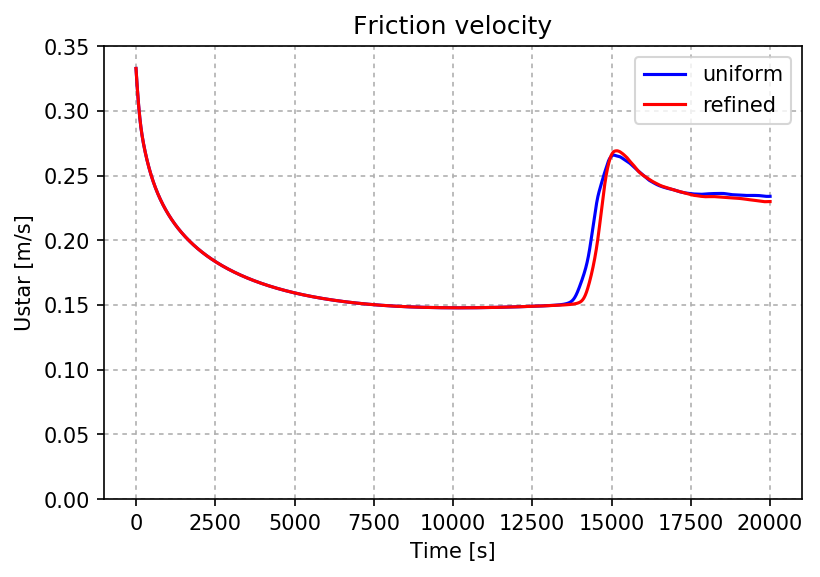

In [9]:
plt.figure(figsize=(6,4), dpi=150)
plt.plot(amrdat['ustar']['t'],  amrdat['ustar']['data'],  'b', label='uniform')
plt.plot(talldat['ustar']['t'], talldat['ustar']['data'], 'r', label='refined')
plt.legend()
plt.ylim([0, 0.35])
plt.grid(ls=':')
plt.xlabel('Time [s]')
plt.ylabel('Ustar [m/s]')
plt.title('Friction velocity')

Loading u
Loading v
Loading u
Loading v


(0, 16000)

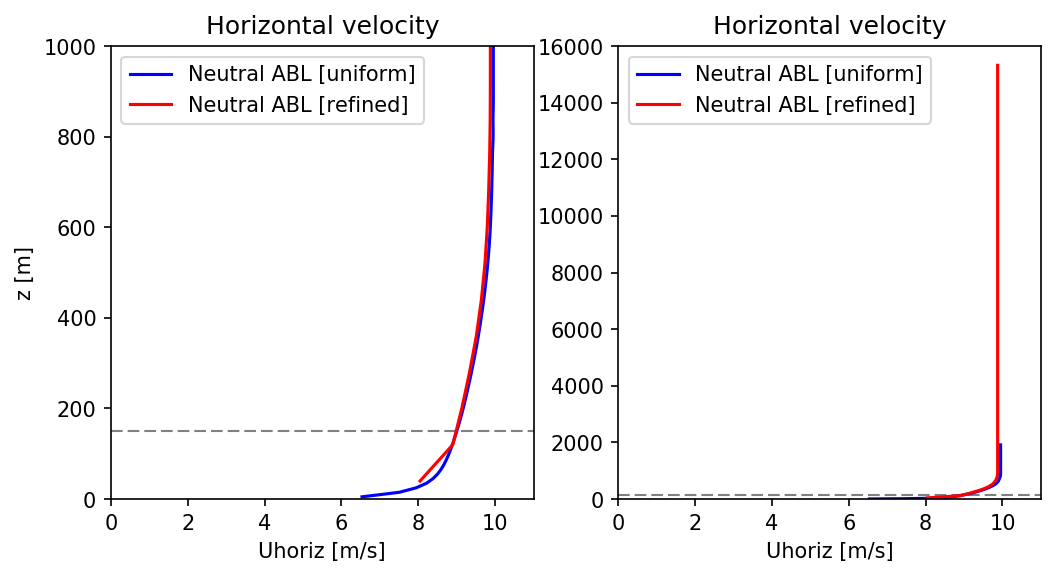

In [10]:
# Plot velocity
fig, axs = plt.subplots(1,2, figsize=(8,4), facecolor='w', dpi=150)

# This command returns the data, and then you can plot it individually
amrdat = case.ABLpostpro_plotprofiles(plotvars=['Uhoriz'], avgt=avgtimes)
talldat = tall.ABLpostpro_plotprofiles(plotvars=['Uhoriz'], avgt=avgtimes)

for ax in axs:
    ax.plot(amrdat['Uhoriz']['data'], amrdat['Uhoriz']['z'], color='b', label='Neutral ABL [uniform]')
    ax.plot(talldat['Uhoriz']['data'], talldat['Uhoriz']['z'], color='r', label='Neutral ABL [refined]')
    ax.hlines(plotheights[0], 0, 11, linestyles='dashed', color='gray', linewidth=1.0) # Plot the HH line
    ax.set_xlim([0, 11])    
    ax.set_xlabel('Uhoriz [m/s]')
    ax.set_title('Horizontal velocity')
    ax.legend()

axs[0].set_ylabel('z [m]')
axs[0].set_ylim([0, 1000])
axs[1].set_ylim([0, 16000])

Loading theta
Loading theta


(0, 16000)

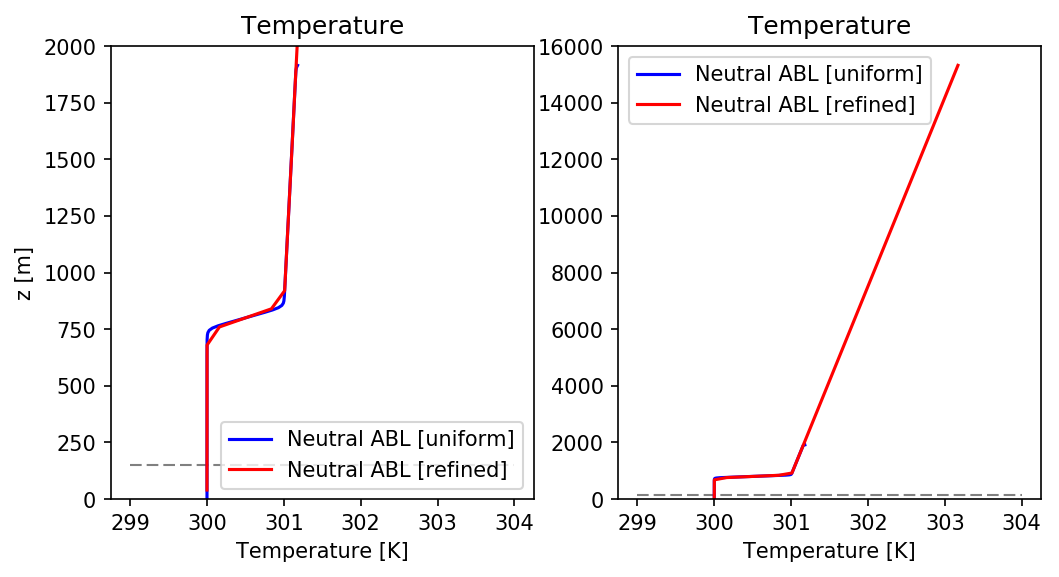

In [11]:
# Plot Temperature
fig, axs = plt.subplots(1,2, figsize=(8,4), facecolor='w', dpi=150)

# This command returns the data, and then you can plot it individually
amrdat = case.ABLpostpro_plotprofiles(plotvars=['Temperature'], avgt=avgtimes)
talldat= tall.ABLpostpro_plotprofiles(plotvars=['Temperature'], avgt=avgtimes)

for ax in axs:
    ax.plot(amrdat['T']['data'], amrdat['T']['z'], color='b', label='Neutral ABL [uniform]')
    ax.plot(talldat['T']['data'], talldat['T']['z'], color='r', label='Neutral ABL [refined]')
    ax.hlines(plotheights[0], 299, 304, linestyles='dashed', color='gray', linewidth=1.0) # Plot the HH line
    ax.set_xlabel('Temperature [K]')
    ax.set_title('Temperature')
    ax.legend()

axs[0].set_ylabel('z [m]')
axs[0].set_ylim([0, 2000])
axs[1].set_ylim([0, 16000])


Loading u
Loading v
Loading u
Loading v


(0, 16000)

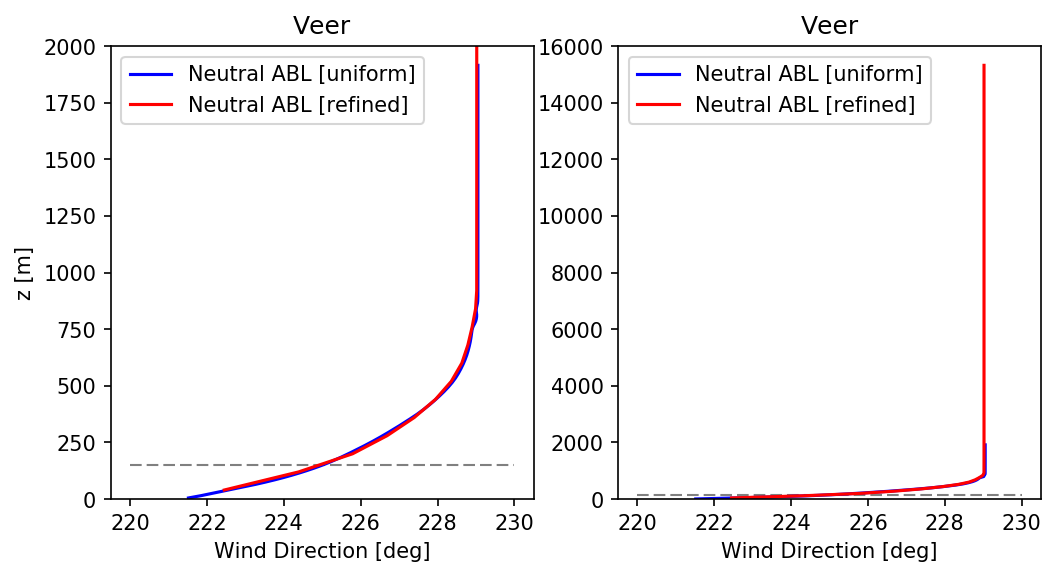

In [12]:
# Plot wind direction
fig, axs = plt.subplots(1,2, figsize=(8,4), facecolor='w', dpi=150)

# This command returns the data, and then you can plot it individually
amrdat = case.ABLpostpro_plotprofiles(plotvars=['WindDir'], avgt=avgtimes)
talldat= tall.ABLpostpro_plotprofiles(plotvars=['WindDir'], avgt=avgtimes)

for ax in axs:
    ax.plot(amrdat['WindDir']['data'], amrdat['WindDir']['z'], color='b', label='Neutral ABL [uniform]')
    ax.plot(talldat['WindDir']['data'], talldat['WindDir']['z'], color='r', label='Neutral ABL [refined]')

    ax.hlines(plotheights[0], 220, 230, linestyles='dashed', color='gray', linewidth=1.0) # Plot the HH line
    ax.set_xlabel('Wind Direction [deg]')
    ax.set_title('Veer')
    ax.legend()
axs[0].set_ylabel('z [m]')
axs[0].set_ylim([0, 2000])
axs[1].set_ylim([0, 16000])

## Make some contour plots

In [13]:
case.Samplepostpro_loadnetcdffile(casedir+'/post_processing/sampling00000.nc')
tall.Samplepostpro_loadnetcdffile(talldir+'/post_processing/sampling00000.nc')

Loading /ascldap/users/lcheung/GPFS/2022/HFM_Q4/precursor/precursor2_5x5_uniform//post_processing/sampling00000.nc
Loading /ascldap/users/lcheung/GPFS/2022/HFM_Q4/precursor/precursor2b_5x5_tallrefined//post_processing/sampling00000.nc


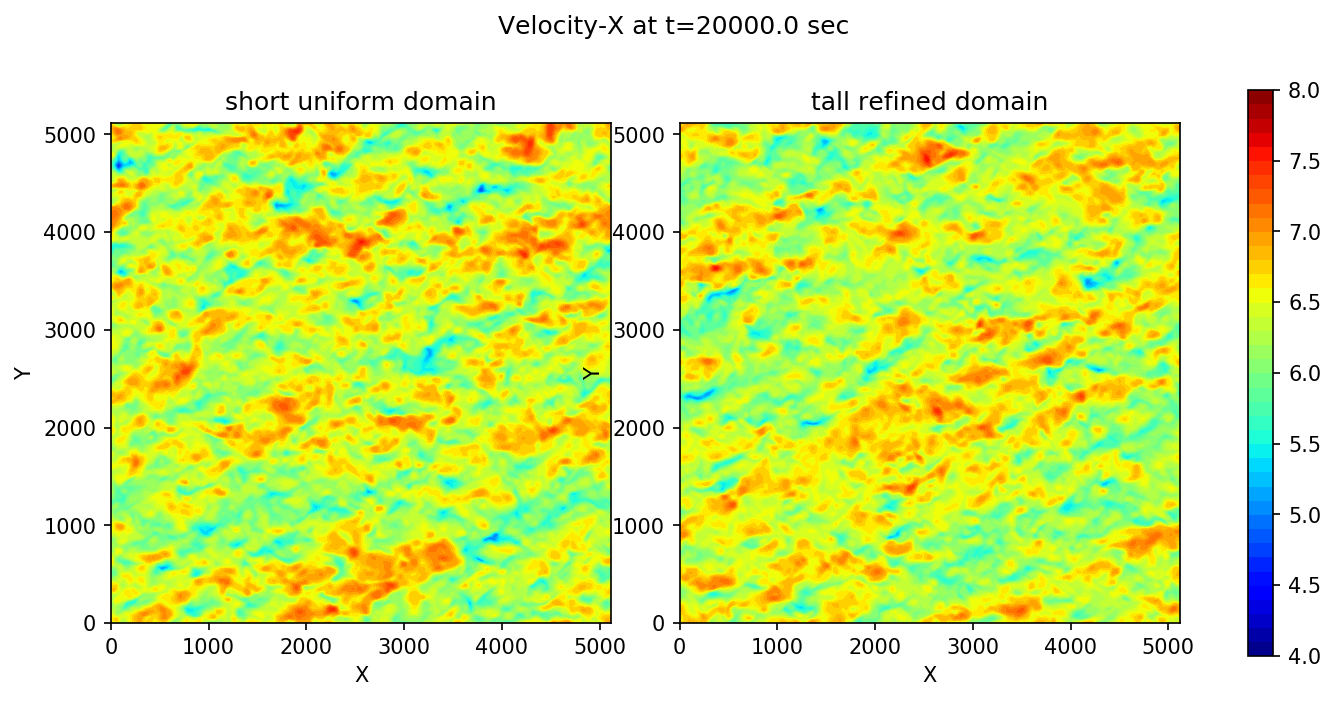

In [14]:
# Plot an image [X-velocity]
levels=np.linspace(4,8,41)
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(10,5), gridspec_kw={'width_ratios': [1, 1, 0.05]}, dpi=150)
im1 = case.plotSamplePlane('p_hub', 'velocityx', 80, 1, 'X','Y', ax=ax0, colorbar=False, levels=levels, cmap=cm.jet)
im2 = tall.plotSamplePlane('p_hub', 'velocityx', 80, 1, 'X','Y', ax=ax1, colorbar=False, levels=levels, cmap=cm.jet)
fig.colorbar(im1[0], cax=ax2)
ax0.set_title('short uniform domain')
ax1.set_title('tall refined domain')
plt.suptitle('Velocity-X at t=20000.0 sec')

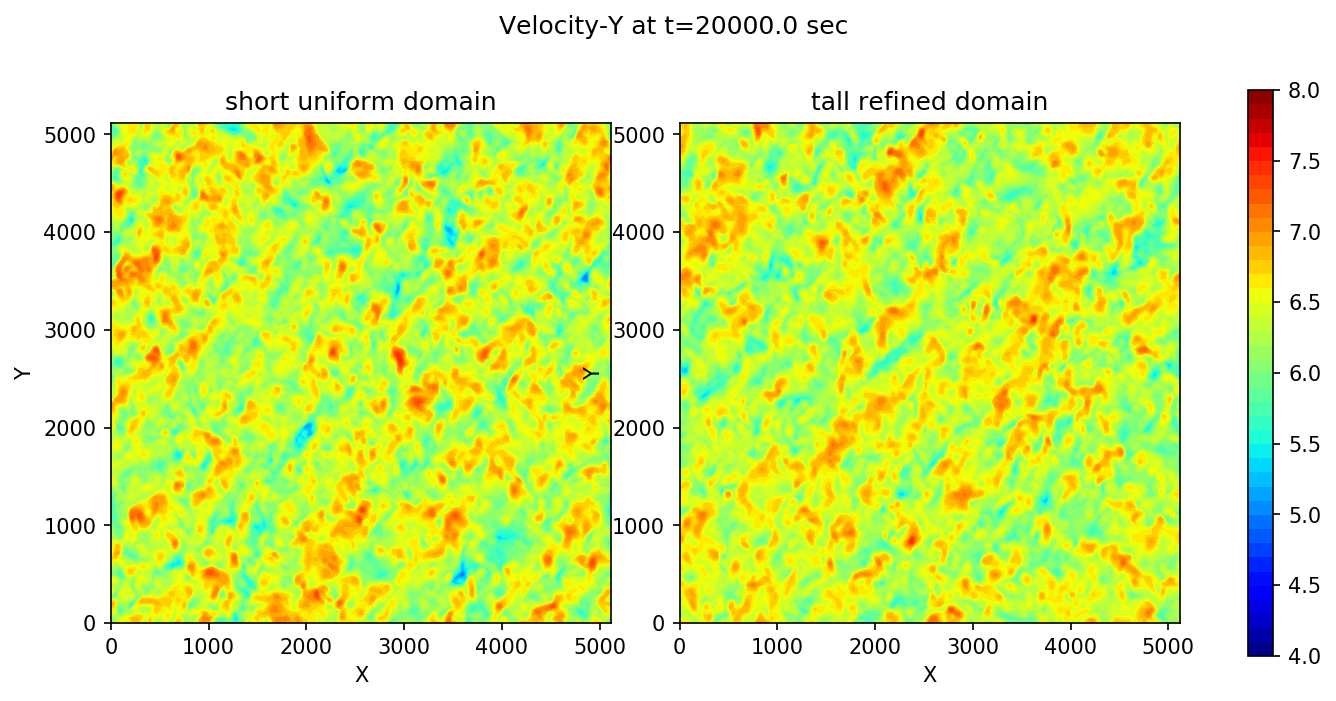

In [15]:
# Plot an image [Y-velocity]
levels=np.linspace(4,8,41)
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(10,5), gridspec_kw={'width_ratios': [1, 1, 0.05]}, dpi=150)
im1 = case.plotSamplePlane('p_hub', 'velocityy', 80, 1, 'X','Y', ax=ax0, colorbar=False, levels=levels, cmap=cm.jet)
im2 = tall.plotSamplePlane('p_hub', 'velocityy', 80, 1, 'X','Y', ax=ax1, colorbar=False, levels=levels, cmap=cm.jet)
fig.colorbar(im1[0], cax=ax2)
ax0.set_title('short uniform domain')
ax1.set_title('tall refined domain')
plt.suptitle('Velocity-Y at t=20000.0 sec')